Name: Osama Sidahmed

Date: 07 Nov 2021

### Description

Source of data is [here](https://ai.stanford.edu/~jkrause/cars/car_dataset.html).

**Overview**

       The Cars dataset or Car196, contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.


**Acknowledgements**

Data source and banner image: http://ai.stanford.edu/~jkrause/cars/car_dataset.html contains all bounding boxes and labels for both training and tests.\
If you use this dataset, please cite the following paper:\
3D Object Representations for Fine-Grained Categorization\
Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei\
4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.

### Objective

The main objective of this project is develop a CNN algorithm that differentiates between the different 196 classes using employing Tensorflow and using the standford cars 196 dataset. Some examples of the classes are:

        'Audi TT Hatchback 2011', 
        'Audi S6 Sedan 2011'
        'Audi S5 Convertible 2012', 
        'Audi S5 Coupe 2012'
        'Audi TT RS Coupe 2012', 
        'BMW ActiveHybrid 5 Sedan 2012'
        'BMW 6 Series Convertible 2007', 
        'BMW X5 SUV 2007'
        
The class description is a combination of the make, model and the year.

### Exploratory Data Analysis and Preparation

On this section we will try to better understand the data and spot some clear patterns.

In [146]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import openCV
import cv2

It has been noticed that the file containing the data classification is provided in a .mat file that we need to process to be able to read the data stored in it. 

In [99]:
# import loadmat from scipy to read the .mat file
from scipy.io import loadmat

In [100]:
# load the .mat files
mat_train = loadmat('data/cars_train_annos.mat', squeeze_me=True)
mat_test = loadmat('data/cars_test_annos_withlabels.mat', squeeze_me=True)
mat_meta = loadmat('data/cars_meta.mat', squeeze_me=True)

In [101]:
# what is the type of the output?
type(mat_train)

dict

The outcome is a dictionary, we can extract the data from the dictionary.

In [102]:
# display the output
mat_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([(39, 116, 569, 375, 14, '00001.jpg'),
        (36, 116, 868, 587, 3, '00002.jpg'),
        (85, 109, 601, 381, 91, '00003.jpg'), ...,
        (26, 246, 660, 449, 163, '08142.jpg'),
        (78, 526, 1489, 908, 112, '08143.jpg'),
        (20, 240, 862, 677, 17, '08144.jpg')],
       dtype=[('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')])}

In [103]:
# display the output
mat_test

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([(30, 52, 246, 147, 181, '00001.jpg'),
        (100, 19, 576, 203, 103, '00002.jpg'),
        (51, 105, 968, 659, 145, '00003.jpg'), ...,
        (33, 27, 602, 252, 17, '08039.jpg'),
        (33, 142, 521, 376, 38, '08040.jpg'),
        (77, 73, 506, 380, 32, '08041.jpg')],
       dtype=[('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')])}

In [104]:
# display the output
mat_meta

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'class_names': array(['AM General Hummer SUV 2000', 'Acura RL Sedan 2012',
        'Acura TL Sedan 2012', 'Acura TL Type-S 2008',
        'Acura TSX Sedan 2012', 'Acura Integra Type R 2001',
        'Acura ZDX Hatchback 2012',
        'Aston Martin V8 Vantage Convertible 2012',
        'Aston Martin V8 Vantage Coupe 2012',
        'Aston Martin Virage Convertible 2012',
        'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008',
        'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012',
        'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994',
        'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011',
        'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012',
        'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007',
        'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012',
        'BMW 1 Series Convertibl

We are only interested in the 'annotations' and the 'class_names' values.

In [105]:
# explore the dictionary
mat_train['annotations']

array([(39, 116, 569, 375, 14, '00001.jpg'),
       (36, 116, 868, 587, 3, '00002.jpg'),
       (85, 109, 601, 381, 91, '00003.jpg'), ...,
       (26, 246, 660, 449, 163, '08142.jpg'),
       (78, 526, 1489, 908, 112, '08143.jpg'),
       (20, 240, 862, 677, 17, '08144.jpg')],
      dtype=[('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')])

In [106]:
# explore the dictionary
mat_meta['class_names']

array(['AM General Hummer SUV 2000', 'Acura RL Sedan 2012',
       'Acura TL Sedan 2012', 'Acura TL Type-S 2008',
       'Acura TSX Sedan 2012', 'Acura Integra Type R 2001',
       'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008',
       'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012',
       'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994',
       'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011',
       'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012',
       'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007',
       'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012',
       'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
       'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
       'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007',
       'BMW X

In [107]:
# explore the dictionary, an example
mat_meta['class_names'][92]

'Dodge Challenger SRT8 2011'

In [108]:
# This is how to extract the datatypes to use as dataframes header
mat_train['annotations'].dtype.descr[0][0]

'bbox_x1'

In [109]:
# extract the data from the .mat files and store them in thre (3) separate datframes

df_1_header = list()

    
# extract the dscription ('relative_im_path', 'O') and store that in a list as header
df_1_header = [x[0] for x in mat_train['annotations'].dtype.descr]

# and extract the values ('car_ims/000001.jpg', 112, 7, 853, 717, 1, 0) and store that in lists representing the columns
df_1_values_0 = [x[0] for x in mat_train['annotations']]
df_1_values_1 = [x[1] for x in mat_train['annotations']]
df_1_values_2 = [x[2] for x in mat_train['annotations']]
df_1_values_3 = [x[3] for x in mat_train['annotations']]
df_1_values_4 = [x[4] for x in mat_train['annotations']]
df_1_values_5 = [x[5] for x in mat_train['annotations']]

# create a dataframe
df_train_bounding_box = pd.DataFrame(list(zip(df_1_values_0, df_1_values_1,
                                       df_1_values_2,df_1_values_3,
                                       df_1_values_4,df_1_values_5)), columns = df_1_header)

# do the same for the test data
# and extract the values ('car_ims/000001.jpg', 112, 7, 853, 717, 1, 0) and store that in lists representing the columns
df_1_values_0 = [x[0] for x in mat_test['annotations']]
df_1_values_1 = [x[1] for x in mat_test['annotations']]
df_1_values_2 = [x[2] for x in mat_test['annotations']]
df_1_values_3 = [x[3] for x in mat_test['annotations']]
df_1_values_4 = [x[4] for x in mat_test['annotations']]
df_1_values_5 = [x[5] for x in mat_test['annotations']]

# create a dataframe
df_test_bounding_box = pd.DataFrame(list(zip(df_1_values_0, df_1_values_1,
                                       df_1_values_2,df_1_values_3,
                                       df_1_values_4,df_1_values_5)), columns = df_1_header)


# store the class (196 classes) on separate dataframe
classes = np.arange(1,len(mat_meta['class_names'])+1)
df_classes = pd.DataFrame(list(zip(classes, mat_meta['class_names'])), columns = ['class', 'name'])

In [110]:
df_train_bounding_box

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname
0,39,116,569,375,14,00001.jpg
1,36,116,868,587,3,00002.jpg
2,85,109,601,381,91,00003.jpg
3,621,393,1484,1096,134,00004.jpg
4,14,36,133,99,106,00005.jpg
...,...,...,...,...,...,...
8139,3,44,423,336,78,08140.jpg
8140,138,150,706,523,196,08141.jpg
8141,26,246,660,449,163,08142.jpg
8142,78,526,1489,908,112,08143.jpg


In [111]:
df_test_bounding_box

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname
0,30,52,246,147,181,00001.jpg
1,100,19,576,203,103,00002.jpg
2,51,105,968,659,145,00003.jpg
3,67,84,581,407,187,00004.jpg
4,140,151,593,339,185,00005.jpg
...,...,...,...,...,...,...
8036,49,57,1169,669,63,08037.jpg
8037,23,18,640,459,16,08038.jpg
8038,33,27,602,252,17,08039.jpg
8039,33,142,521,376,38,08040.jpg


Let us look at this dataframe columns:
- **fname:** the image file name.
- **bbox_x1, bbox_y1, bbox_x2, and bbox_y2:** define each image's object of interest bounding box. We may or may not use this information
- **class:** the image class, one of 196 possible classes as defined by the next dataframe

In [112]:
df_classes

,class,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012
...,...,...
191,192,Volkswagen Beetle Hatchback 2012
192,193,Volvo C30 Hatchback 2012
193,194,Volvo 240 Sedan 1993
194,195,Volvo XC90 SUV 2007


Let us look at this dataframe columns:
- **class:** the image class
- **name:** the class name

For the sake of convenience, let us merge these two dataframes together. 

In [113]:
df_train_info = df_train_bounding_box.merge(df_classes, left_on='class', right_on='class', how = 'left')
df_train_info.sample(5)

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name
8136,30,287,999,658,17,08137.jpg,Audi 100 Sedan 1994
1064,277,454,1504,1069,34,01065.jpg,BMW M3 Coupe 2012
6529,72,73,316,217,8,06530.jpg,Aston Martin V8 Vantage Convertible 2012
2086,19,533,3220,1953,30,02087.jpg,BMW 3 Series Wagon 2012
6315,31,52,291,192,83,06316.jpg,Dodge Caliber Wagon 2012


In [114]:
df_train_info

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012
...,...,...,...,...,...,...,...
8139,3,44,423,336,78,08140.jpg,Chrysler Town and Country Minivan 2012
8140,138,150,706,523,196,08141.jpg,smart fortwo Convertible 2012
8141,26,246,660,449,163,08142.jpg,Mercedes-Benz SL-Class Coupe 2009
8142,78,526,1489,908,112,08143.jpg,Ford GT Coupe 2006


In [115]:
# do the same for the test data
df_test_info = df_test_bounding_box.merge(df_classes, left_on='class', right_on='class', how = 'left')
df_test_info.sample(5)

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name
1944,55,89,548,373,166,01945.jpg,Mercedes-Benz Sprinter Van 2012
5691,42,115,596,303,59,05692.jpg,Chevrolet Camaro Convertible 2012
5796,16,58,597,361,3,05797.jpg,Acura TL Sedan 2012
2059,31,146,596,361,119,02060.jpg,GMC Savana Van 2012
7570,13,160,1271,677,55,07571.jpg,Chevrolet Corvette Convertible 2012


Let us check the number of train vs the number of test images.

In [116]:
df_train_info.shape[0], df_test_info.shape[0]

(8144, 8041)

We have almost a 50/50 split of images, can we increase the to the favor of train set? we will do that later if necessary after we do more EDA.

Let us now have a look some sample images of our different classes, but first let us first load our data using the`ImageDataGenerator`.

Before we use the ImageDataGenerator, we need to re-organize the data into folders where each class is stored in a separate folder. The best and fastest method to do this is using the command line.

The current setup is 8144 in one folder (train data folder) and 8041 in another folder (test data folder).

The end result is two folders, one for train data images and another one for test data images where each folder contain 196 folders, one folder for each class.

Now to decide if we want to reassign some of the test data to the train data to have a split of ~70/30 instead of the ~50/50, let us have a quick look at the train and test data in the dataframe.

In [117]:
for class_ in df_train_info['class'].unique():
    print(f' Class ***{class_ }*** \n train:{df_train_info["class"][df_train_info["class"] == class_].count()}, test:{df_test_info["class"][df_train_info["class"] == class_].count()}')

 Class ***14*** 
 train:43, test:43
 Class ***3*** 
 train:43, test:42
 Class ***91*** 
 train:39, test:39
 Class ***134*** 
 train:34, test:34
 Class ***106*** 
 train:42, test:42
 Class ***123*** 
 train:45, test:44
 Class ***89*** 
 train:44, test:44
 Class ***96*** 
 train:41, test:41
 Class ***167*** 
 train:48, test:48
 Class ***58*** 
 train:44, test:44
 Class ***49*** 
 train:38, test:38
 Class ***186*** 
 train:39, test:38
 Class ***135*** 
 train:42, test:42
 Class ***85*** 
 train:44, test:42
 Class ***193*** 
 train:42, test:41
 Class ***172*** 
 train:44, test:44
 Class ***73*** 
 train:45, test:45
 Class ***192*** 
 train:43, test:43
 Class ***57*** 
 train:38, test:38
 Class ***79*** 
 train:49, test:47
 Class ***36*** 
 train:41, test:40
 Class ***120*** 
 train:43, test:43
 Class ***170*** 
 train:44, test:43
 Class ***194*** 
 train:46, test:46
 Class ***184*** 
 train:41, test:41
 Class ***86*** 
 train:43, test:43
 Class ***180*** 
 train:43, test:43
 Class ***154**

The classes are distributed almost evenly between the train and test sets.

To change this balance to ~70/30 we need to reassign around 3200 images from test to train which is around 3150/196 = 16 images per class.

To do that in command line we first need to:
1. rename the images in the test dataframe to continue in order after the train images names
2. merge the two dateframes while introducing a new column to represent if the image is a train or test (0 or 1)
3. reassign the images in the dataframe (16 of each class)
4. export a text file with the images the train/test value and the class
5. use command line to:
    1. rename all the test images respectively based on the step 1 above
    2. create the respective folders train-> 196 subfolders and test-> 196 subfolders (this will result in automatic labeling by the ImageDataGenerator)
    3. copy the images to the right folder based on the text file

In [118]:
df_test_info['fname'].shape

(8041,)

In [119]:
# 1. rename the images in the test dataframe to continue in order after the train images names
# what is the name of the last image in the train dataframe?
df_train_info['fname'].tail(1)
# 08144.jpg

df_test_info['fname']  = ('0' + (df_test_info['fname'].str[:-4].astype(int) + 8144).astype(str) + '.jpg')

# df_test_info['fname'] = df_test_info.apply(lambda x: ('0' + (df_test_info['fname'].str[:-4].astype(int) + 8144).astype(str) + '.jpg'))

In [120]:
df_test_info

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name
0,30,52,246,147,181,08145.jpg,Suzuki Aerio Sedan 2007
1,100,19,576,203,103,08146.jpg,Ferrari 458 Italia Convertible 2012
2,51,105,968,659,145,08147.jpg,Jeep Patriot SUV 2012
3,67,84,581,407,187,08148.jpg,Toyota Camry Sedan 2012
4,140,151,593,339,185,08149.jpg,Tesla Model S Sedan 2012
...,...,...,...,...,...,...,...
8036,49,57,1169,669,63,016181.jpg,Chevrolet Sonic Sedan 2012
8037,23,18,640,459,16,016182.jpg,Audi V8 Sedan 1994
8038,33,27,602,252,17,016183.jpg,Audi 100 Sedan 1994
8039,33,142,521,376,38,016184.jpg,BMW Z4 Convertible 2012


In [123]:
df_test_info[df_test_info['fname'] == '016185.jpg']

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name
8040,77,73,506,380,32,016185.jpg,BMW X5 SUV 2007


Now images file names are a continuation from the train dataframe.

In [118]:
# df_test_info.iloc[:10,:].copy()

We can now merge the two dattaframes together butt before the we need to create a new column 'test' equals to 0 for the train images and 1 for the test images.

In [124]:
# 2. merge the two dateframes while introducing a new column to represent if the image is a train or test (0 or 1)
df_train_info['test'] = '0'
df_test_info['test'] = '1'

df_info = pd.concat([df_train_info,df_test_info],ignore_index=True)

In [125]:
df_info

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name,test
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012,0
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012,0
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007,0
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,0
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,0
...,...,...,...,...,...,...,...,...
16180,49,57,1169,669,63,016181.jpg,Chevrolet Sonic Sedan 2012,1
16181,23,18,640,459,16,016182.jpg,Audi V8 Sedan 1994,1
16182,33,27,602,252,17,016183.jpg,Audi 100 Sedan 1994,1
16183,33,142,521,376,38,016184.jpg,BMW Z4 Convertible 2012,1


In [126]:
df_info.sample(3)

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name,test
329,168,92,333,305,166,00330.jpg,Mercedes-Benz Sprinter Van 2012,0
8489,165,255,1390,968,167,08490.jpg,Mitsubishi Lancer Sedan 2012,1
15662,1,2,120,120,158,015663.jpg,Maybach Landaulet Convertible 2012,1


In [127]:
# 3. reassign the images in the dataframe (16 of each class)
# this step requires us changing the test column value from 1 to 0 for these images

for class_ in df_info['class'].unique():
    # get the indexes of rows to change thier test values
    df = df_info['test'][(df_info['class'] == class_) & (df_info['test'] == '1')].iloc[:16]
    # use the above as a mask to change the test values
    df_info['test'][df.index] = '0'

C:\Users\omass\AppData\Local\Temp/ipykernel_17936/1117982539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['test'][df.index] = '0'


Now let us check he new value_counts(), we are expecting a 70/30 split instead of the 50/50 we had earlier.

In [128]:
df_info['test'].value_counts()

0    11280
1     4905
Name: test, dtype: int64

Good, Let us confirm that.

In [130]:
df_info['test'].value_counts()[0] / (df_info['test'].value_counts()[0]+ df_info['test'].value_counts()[1])

0.6969416126042632

Perfect, around 70/30 split.

In [131]:
for class_ in df_info['class'].unique():
    print(f' Class ***{class_ }*** \n train:{df_info["test"][df_info["class"] == class_].value_counts()[0]}, test:{df_info["test"][df_info["class"] == class_].value_counts()[1]}')

 Class ***14*** 
 train:59, test:26
 Class ***3*** 
 train:59, test:27
 Class ***91*** 
 train:55, test:22
 Class ***134*** 
 train:50, test:17
 Class ***106*** 
 train:58, test:25
 Class ***123*** 
 train:61, test:28
 Class ***89*** 
 train:60, test:28
 Class ***96*** 
 train:57, test:25
 Class ***167*** 
 train:64, test:31
 Class ***58*** 
 train:60, test:28
 Class ***49*** 
 train:54, test:21
 Class ***186*** 
 train:55, test:22
 Class ***135*** 
 train:58, test:26
 Class ***85*** 
 train:60, test:27
 Class ***193*** 
 train:58, test:25
 Class ***172*** 
 train:60, test:28
 Class ***73*** 
 train:61, test:28
 Class ***192*** 
 train:59, test:26
 Class ***57*** 
 train:54, test:21
 Class ***79*** 
 train:65, test:32
 Class ***36*** 
 train:57, test:25
 Class ***120*** 
 train:59, test:26
 Class ***170*** 
 train:60, test:28
 Class ***194*** 
 train:62, test:29
 Class ***184*** 
 train:57, test:24
 Class ***86*** 
 train:59, test:26
 Class ***180*** 
 train:59, test:26
 Class ***154**

In [132]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16185 entries, 0 to 16184
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bbox_x1  16185 non-null  int64 
 1   bbox_y1  16185 non-null  int64 
 2   bbox_x2  16185 non-null  int64 
 3   bbox_y2  16185 non-null  int64 
 4   class    16185 non-null  int64 
 5   fname    16185 non-null  object
 6   name     16185 non-null  object
 7   test     16185 non-null  object
dtypes: int64(5), object(3)
memory usage: 1011.7+ KB


Let us change the `test` data type to integer.

In [133]:
df_info['test'] = df_info['test'].astype(int) 

In [134]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16185 entries, 0 to 16184
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bbox_x1  16185 non-null  int64 
 1   bbox_y1  16185 non-null  int64 
 2   bbox_x2  16185 non-null  int64 
 3   bbox_y2  16185 non-null  int64 
 4   class    16185 non-null  int64 
 5   fname    16185 non-null  object
 6   name     16185 non-null  object
 7   test     16185 non-null  int32 
dtypes: int32(1), int64(5), object(2)
memory usage: 948.5+ KB


One thing we can do here on the files names to save us a hassle when we work with command line is to ensure the file naming is uniform with the same number of strings.

In [135]:
df_info['fname'] = df_info['fname'].str[-9:]

In [136]:
df_info

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name,test
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012,0
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012,0
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007,0
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,0
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,0
...,...,...,...,...,...,...,...,...
16180,49,57,1169,669,63,16181.jpg,Chevrolet Sonic Sedan 2012,1
16181,23,18,640,459,16,16182.jpg,Audi V8 Sedan 1994,1
16182,33,27,602,252,17,16183.jpg,Audi 100 Sedan 1994,1
16183,33,142,521,376,38,16184.jpg,BMW Z4 Convertible 2012,1


In [137]:
df_info[df_info['fname'] == '16180.jpg']

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,name,test
16179,3,81,778,561,184,16180.jpg,Suzuki SX4 Sedan 2012,1


In [140]:
df_info.shape

(16185, 8)

In [141]:
# 4. export a text file with the images the train/test value and the class
df_info[['fname', 'class', 'test', 'name']].to_csv('data/df_info.csv', sep=';', encoding='utf-8-sig', header=True, index = False)

In [96]:
#5. use command line to:

#5. use command line to: \
A. rename all the test images respectively based on the step 1 above

    
    file_name=8145; 
    for i in *.jpg; 
    do 
    new=$(printf "%05d.jpg" "$file_name"); 
    mv -i -- "$i" "$new"; 
    let file_name=file_name+1; 
    done

    
B. create the respective folders train-> 196 subfolders and test-> 196 subfolders


    mkdir train test
    
    for i in {1..196}; 
    do 
    mkdir "train/$i";
mkdir "test/$i"; 
    done
    
C. copy the newly renamed files to the directory where the train set files are

    mv  -v test/* train/

D. copy the images to the right folder based on the text file 
    
    while IFS=";" read fname class test name;  
    do  
    if [ "$test" == "0" ];
    then       
    echo "Moving file: $fname class: $class to folder: train/$class";
    mv "$fname" "../directory/train/$class/";
    elif [ "$test" == "1" ];
    then      
    echo "Moving file: $fname class: $class to folder: test/$class";
    mv "$fname" "../directory/test/$class/";
    else 
    echo "failed to move!";
    fi
    done < "df_info.csv"


Now we have all the files in the right directories as planned. We can now continue or data exploration.

In [142]:
# import th ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The generator will help us to augment our data when it comes to creating a more robust model by performing image transformations on our training set, mainly:
- reflect
- rotate
- crop and zoom
- shear, and others

In [492]:
# the dimension of images to be processed
height = 224 
width = 224
channels = 3

# create the generator for the trainig set with scaling
train_idg = ImageDataGenerator(rescale = 1./255, rotation_range = 30,
                              shear_range = 0.2, zoom_range = 0.2,
                              horizontal_flip = True)

# create the generator for the test set with scaling
validation_idg = ImageDataGenerator(rescale = 1./255, rotation_range = 30,
                              shear_range = 0.2, zoom_range = 0.2,
                              horizontal_flip = True)

# define the directory
train_gen = train_idg.flow_from_directory('data/train', target_size = (height, width),
                                         color_mode = 'rgb', batch_size = 32,
                                         class_mode = 'categorical') 

# define the directory
validation_gen = validation_idg.flow_from_directory('data/test', target_size = (height, width),
                                         color_mode = 'rgb', batch_size = 32,
                                         class_mode = 'categorical') 

Found 11280 images belonging to 196 classes.
Found 4905 images belonging to 196 classes.


As Expected, 196 class in our train set and test set with the right number of images.

Let us visualize the classes with some sample images to see what the data is like.

In [405]:
df_info['name'][df_info['class'] == 1]

162      AM General Hummer SUV 2000
461      AM General Hummer SUV 2000
521      AM General Hummer SUV 2000
706      AM General Hummer SUV 2000
772      AM General Hummer SUV 2000
                    ...            
15536    AM General Hummer SUV 2000
15673    AM General Hummer SUV 2000
16060    AM General Hummer SUV 2000
16091    AM General Hummer SUV 2000
16178    AM General Hummer SUV 2000
Name: name, Length: 89, dtype: object

In [179]:
df_info['name'][df_info['class'] == 2].unique()

array(['Acura RL Sedan 2012'], dtype=object)

In [375]:
class_sample_labels

array([151,  94,  26,  97,  64, 118,  54,  11,   7, 122,  13,  92, 133,
       107,  79, 129,  40,  33,  73, 136,  30,  67,  28, 150, 185])

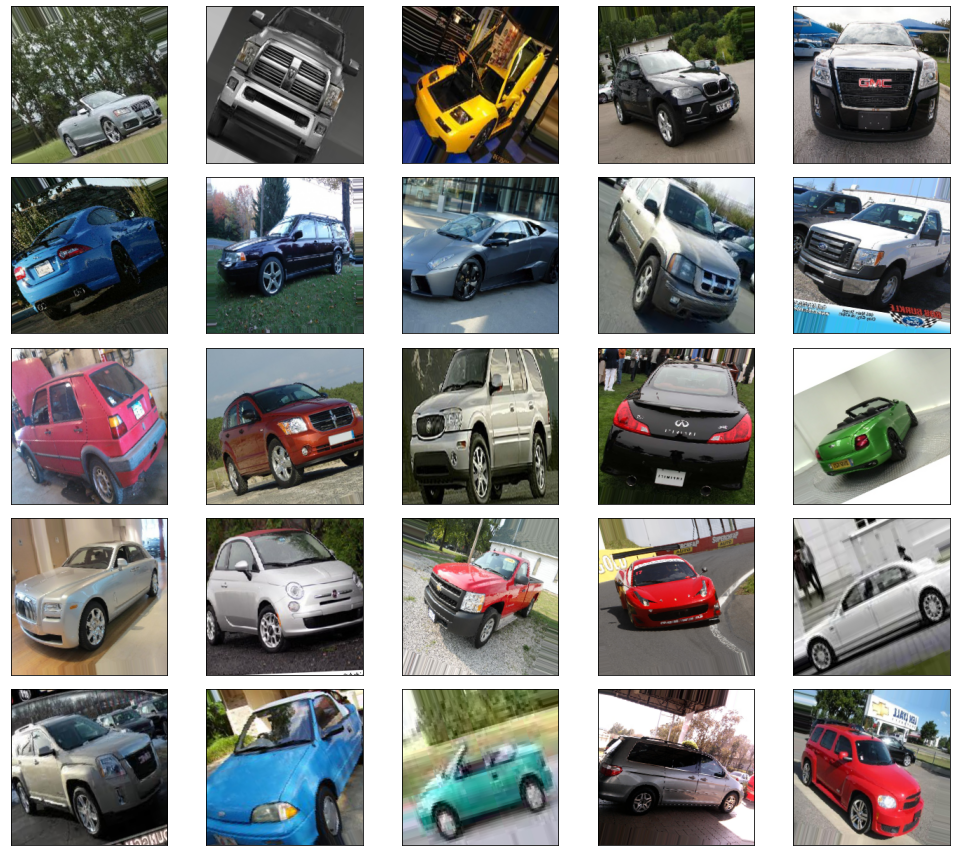

In [493]:
# use the 
x, y = train_gen.next() 

# pick random 25 classes from our 196 as a sample to show
class_sample_labels = np.random.choice(list(range(1, 197)), 25, replace=False)

# Our images labels are one-hot encoded, lets 
# convert them to ordinal encoding
labels = np.argmax(y, axis=1)

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(14, 12))
ax = ax.flatten()

for i in range(25):
#     index = np.argmax(labels==i)  
    ax[i].imshow(x[i])
    
#     # Set the title of the subplot
#     ax[i].set_title(df_info['name'][df_info['class'] == labels[i]].unique())
    
    # Hide the x and y ticks
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])
#     print(index)
    

# fig.suptitle("Classification Labels", size = 20)
fig.tight_layout()

# Delete the unused subplots
# fig.delaxes(ax[-1])

We can see here different cars from different classes, twisted, squeezed, rotated, etc by the ImageDataGenerator. But we also can see that many images contain a lot of other details that will impact our training, for instance, some images have others cars included, or people, and sometimes buildings and dealer's logo. So we will use OpenCV to read those images use the bounding box info that we have already and crop the image, then save them to the local disk.

Use OpenCV to:
- load image
- crop it
- save it again

In [487]:
# read the image
img = cv2.imread('data/train/43/01130.jpg')

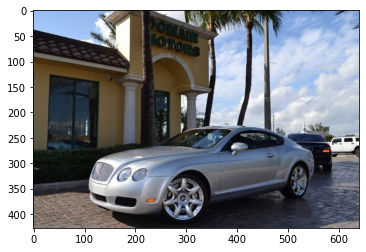

In [488]:
# the image before cropping
plt.imshow(img[:,:,::-1]);

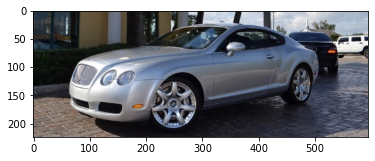

In [489]:
# the image after cropping
bbox_y1 = int(df_info['bbox_y1'][df_info['fname'] == '01008.jpg'])
bbox_y2 = int(df_info['bbox_y2'][df_info['fname'] == '01008.jpg'])
bbox_x1 = int(df_info['bbox_x1'][df_info['fname'] == '01008.jpg'])
bbox_x2 = int(df_info['bbox_x2'][df_info['fname'] == '01008.jpg'])
cropped_image = img[bbox_y1:bbox_y2, bbox_x1:bbox_x2]
plt.imshow(cropped_image[:,:,::-1]);

It is worth at this stage to mention that the size of the image has been reduced in addition to removing the building and tree from it making it more machine learning-friendly. The bounding box dimensions for this image could have been better by also removing the cars in the background.

In [196]:
# create new directories for the croped images
import os
for folder in list(range(1,197)):
    os.makedirs('data/train_resized/' + str(folder))
    os.makedirs('data/test_resized/' + str(folder))

In [347]:
# crop all train data files and save to different directory
for folder in list(range(1,197)):
    for _, _, f in os.walk('data/train/' + str(folder)):
        for i in f:r
            img = cv2.imread('data/train/'+ str(folder) + '/'+ i)
            bbox_y1 = int(df_info['bbox_y1'][df_info['fname'] == i])
            bbox_y2 = int(df_info['bbox_y2'][df_info['fname'] == i])
            bbox_x1 = int(df_info['bbox_x1'][df_info['fname'] == i])
            bbox_x2 = int(df_info['bbox_x2'][df_info['fname'] == i])
            cropped_image = img[bbox_y1:bbox_y2, bbox_x1:bbox_x2]

            cv2.imwrite(('data/train_resized/'+ str(folder)  + '/'+ i), cropped_image)
        print('Folder ' + str(folder) + ' finished...', end = '\r')

In [312]:
# crop all test data files and save to different directory
for folder in list(range(1,197)):
    for _, _, f in os.walk('data/test/' + str(folder)):
        for i in f:
            img = cv2.imread('data/test/'+ str(folder) + '/'+ i)
            bbox_y1 = int(df_info['bbox_y1'][df_info['fname'] == i])
            bbox_y2 = int(df_info['bbox_y2'][df_info['fname'] == i])
            bbox_x1 = int(df_info['bbox_x1'][df_info['fname'] == i])
            bbox_x2 = int(df_info['bbox_x2'][df_info['fname'] == i])
            cropped_image = img[bbox_y1:bbox_y2, bbox_x1:bbox_x2]

            cv2.imwrite(('data/test_resized/'+ str(folder)  + '/'+ i), cropped_image)
        print('Folder ' + str(folder) + ' finished...', end = '\r')

Now we will update our data generator with the new directory.

In [494]:
# define the directory
train_gen = train_idg.flow_from_directory('data/train_resized', target_size = (height, height),
                                         color_mode = 'rgb', batch_size = 32,
                                         class_mode = 'categorical') 

# define the directory
validation_gen = validation_idg.flow_from_directory('data/test_resized', target_size = (height, height),
                                         color_mode = 'rgb', batch_size = 32,
                                         class_mode = 'categorical') 

Found 11280 images belonging to 196 classes.
Found 4905 images belonging to 196 classes.


Good, the number of images and class as expected.

**TODO: there is more to do here before evaluation, we will come back to this later**

### Modelling and Evaluation

We will start by training a very basic CNN model to consider it as a base line for the rest of the model.

In [501]:
# import Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [499]:
# creare the model

num_classes = 196

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(height, width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [505]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(train_gen, validation_data=validation_gen, epochs=epochs)

Epoch 1/10
 30/353 [=>............................] - ETA: 8:59 - loss: 5.2996 - accuracy: 0.0042